Deliveries times is by far one of the most important metrics for a business to evaluate. While it's not the favorite measure, it's a number that can give your company the hard truth about how efficient they have been. This analytic covers the importance of dasher at restauraunt, and order delivered to consumer in Teleco service and reasons customers leave the service. Going forward this project, we help the analytic personals and managers create a more affective service and retain customers.

Our hypothesis is we gain most of our revenue in the Palto Alto region. This data was collected from DoorDash Technical Recruiter. Deliveries. The data contains 13 variables and 18078 observers. We do have missing values to fill and drop columns that are not needed.

This dataset contains information about:

Customer placed order datetime: Time that customer placed the order; the format is ::

Placed order with restaurant datetime: Time that restaurant received order; the format is ::

Driver at restaurant datetime: Time that driver arrives at restaurant; the format is ::

Delivered to consumer datetime: Time that driver delivered to customer; the format is ::

Driver ID: Unique identifier of driver

Restaurant ID: Unique identifier of restaurant

Consumer ID: Unique identifier of customer

Delivery Region: City where restaurant is located

Is ASAP: Equals TRUE for on-demand orders; FALSE for scheduled deliveries (e.g., a customer places an order at 10am for 12noon)

Order total: Amount customer spent (including delivery fee); units are in dollars

Amount discount: Amount of discounts redeemed (e.g., for referrals); units are in dollars

Amount of tip: Amount of tip given; units are in dollars

Refunded amount: Amount refunded to customer; units are in dollars

Times: Time is in UTC and we operate on PT

In [1]:
import pandas as pd
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from datetime import datetime
from pytz import all_timezones

In [2]:
d_parser = lambda x: pd.datetime.strptime(x,"%d %H:%M:%S")
df = pd.read_excel("deliveries.xlsx", parse_dates=["Customer placed order datetime","Placed order with restaurant datetime",
                                                  "Driver at restaurant datetime","Delivered to consumer datetime"], date_parser=d_parser)

In [3]:
# replace whitespace with underscore to aviod error and changing column names to lowercase for speed
df.columns = df.columns.str.replace(' ', '_')
df.columns = map(str.lower, df.columns)

In [4]:
# lets see the first 9 rows of our data
df.head(9)

,customer_placed_order_datetime,placed_order_with_restaurant_datetime,driver_at_restaurant_datetime,delivered_to_consumer_datetime,driver_id,restaurant_id,consumer_id,delivery_region,is_asap,order_total,amount_of_discount,amount_of_tip,refunded_amount
0,1900-01-01 02:52:12,1900-01-01 03:00:25,1900-01-01 03:08:09,1900-01-01 03:35:20,279,50,6738,Mountain View,True,16.33,0.0,0.82,0.0
1,1900-01-13 15:58:57,1900-01-13 17:56:45,1900-01-13 18:24:39,1900-01-13 18:57:01,303,96,64746,Palo Alto,True,76.14,0.0,6.45,0.0
2,1900-01-17 19:02:37,1900-01-17 19:12:51,1900-01-17 19:19:59,1900-01-17 19:31:09,212,190,12484,San Jose,True,16.77,6.0,2.52,0.0
3,1900-01-12 04:01:57,1900-01-12 04:08:18,1900-01-12 04:13:02,1900-01-12 04:37:57,352,194,13920,San Jose,True,25.03,0.0,5.00,0.0
4,1900-01-08 23:46:38,1900-01-08 23:49:32,1900-01-08 23:54:29,1900-01-09 00:37:15,313,9,7037,Palo Alto,True,51.57,0.0,5.16,0.0
5,1900-01-12 03:54:30,1900-01-12 03:57:30,1900-01-12 04:10:26,1900-01-12 04:41:00,314,350,95392,Palo Alto,True,16.17,6.0,0.93,0.0
6,1900-01-12 04:14:15,1900-01-12 04:14:41,1900-01-12 04:25:32,1900-01-12 04:53:25,154,27,7426,Palo Alto,True,48.79,0.0,5.90,0.0
7,1900-01-12 04:20:10,1900-01-12 04:20:25,1900-01-12 04:26:51,1900-01-12 05:04:19,315,107,95797,Palo Alto,True,35.74,6.0,1.36,0.0
8,1900-01-13 22:45:41,1900-01-13 23:22:33,NaT,1900-01-13 23:49:14,196,225,2469,Mountain View,False,35.85,0.0,2.00,0.0


In [5]:
#Changing time zone from UTC to PT time zone
date_time = pd.date_range(start='1900-01-01 03:00:25', freq='H', periods=3, tz='US/Pacific')
date_time

DatetimeIndex(['1900-01-01 03:00:25-07:53', '1900-01-01 04:00:25-07:53',
               '1900-01-01 05:00:25-07:53'],
              dtype='datetime64[ns, US/Pacific]', freq='H')

In [6]:
# changing the long column names to shorter ones for speed
df.rename(columns={"customer_placed_order_datetime": "cust_order_time", 
                   "placed_order_with_restaurant_datetime": "order_with_rest_time",
                   "driver_at_restaurant_datetime": "arrive_at_rest_time",
                  "delivered_to_consumer_datetime": "deliver_to_cust_time"}, inplace=True)

In [7]:
# looking at the 13 columns and 18077 observations
# lets see the data types if they match culumns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18078 entries, 0 to 18077
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_order_time       18078 non-null  datetime64[ns]
 1   order_with_rest_time  18038 non-null  datetime64[ns]
 2   arrive_at_rest_time   13547 non-null  datetime64[ns]
 3   deliver_to_cust_time  18078 non-null  datetime64[ns]
 4   driver_id             18078 non-null  int64         
 5   restaurant_id         18078 non-null  int64         
 6   consumer_id           18078 non-null  int64         
 7   delivery_region       18078 non-null  object        
 8   is_asap               18078 non-null  bool          
 9   order_total           18078 non-null  float64       
 10  amount_of_discount    18078 non-null  float64       
 11  amount_of_tip         18078 non-null  float64       
 12  refunded_amount       18078 non-null  float64       
dtypes: bool(1), date

(18078, 13)

In [8]:
df.loc[0, "cust_order_time"].day_name()

'Monday'

In [9]:
df["cust_order_time"].dt.day_name()

0           Monday
1         Saturday
2        Wednesday
3           Friday
4           Monday
           ...    
18073      Tuesday
18074      Tuesday
18075      Tuesday
18076      Tuesday
18077      Tuesday
Name: cust_order_time, Length: 18078, dtype: object

In [10]:
df["day_of_week"]= df["cust_order_time"].dt.day_name()

In [11]:
df

,cust_order_time,order_with_rest_time,arrive_at_rest_time,deliver_to_cust_time,driver_id,restaurant_id,consumer_id,delivery_region,is_asap,order_total,amount_of_discount,amount_of_tip,refunded_amount,day_of_week
0,1900-01-01 02:52:12,1900-01-01 03:00:25,1900-01-01 03:08:09,1900-01-01 03:35:20,279,50,6738,Mountain View,True,16.33,0.0,0.82,0.0,Monday
1,1900-01-13 15:58:57,1900-01-13 17:56:45,1900-01-13 18:24:39,1900-01-13 18:57:01,303,96,64746,Palo Alto,True,76.14,0.0,6.45,0.0,Saturday
2,1900-01-17 19:02:37,1900-01-17 19:12:51,1900-01-17 19:19:59,1900-01-17 19:31:09,212,190,12484,San Jose,True,16.77,6.0,2.52,0.0,Wednesday
3,1900-01-12 04:01:57,1900-01-12 04:08:18,1900-01-12 04:13:02,1900-01-12 04:37:57,352,194,13920,San Jose,True,25.03,0.0,5.00,0.0,Friday
4,1900-01-08 23:46:38,1900-01-08 23:49:32,1900-01-08 23:54:29,1900-01-09 00:37:15,313,9,7037,Palo Alto,True,51.57,0.0,5.16,0.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18073,1900-01-30 04:28:10,1900-01-30 04:29:52,NaT,1900-01-30 04:58:44,287,44,46332,Mountain View,True,44.99,0.0,6.00,0.0,Tuesday
18074,1900-01-30 18:33:19,1900-01-30 18:50:06,1900-01-30 19:08:19,1900-01-30 19:20:41,184,44,11055,Mountain View,True,35.80,0.0,5.00,0.0,Tuesday
18075,1900-01-30 17:40:02,1900-01-30 18:06:01,1900-01-30 18:22:25,1900-01-30 18:40:20,232,330,24289,San Jose,False,29.33,0.0,1.07,0.0,Tuesday
18076,1900-01-30 18:25:36,1900-01-30 18:34:26,1900-01-30 19:21:52,1900-01-30 19:45:36,399,353,2643,Palo Alto,True,123.69,0.0,5.13,0.0,Tuesday


In [12]:
# checking to make sure bool data type was converted into object
df.is_asap = df.is_asap.astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18078 entries, 0 to 18077
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_order_time       18078 non-null  datetime64[ns]
 1   order_with_rest_time  18038 non-null  datetime64[ns]
 2   arrive_at_rest_time   13547 non-null  datetime64[ns]
 3   deliver_to_cust_time  18078 non-null  datetime64[ns]
 4   driver_id             18078 non-null  int64         
 5   restaurant_id         18078 non-null  int64         
 6   consumer_id           18078 non-null  int64         
 7   delivery_region       18078 non-null  object        
 8   is_asap               18078 non-null  object        
 9   order_total           18078 non-null  float64       
 10  amount_of_discount    18078 non-null  float64       
 11  amount_of_tip         18078 non-null  float64       
 12  refunded_amount       18078 non-null  float64       
 13  day_of_week     

In [13]:
# checking for any null values and we do have some
df.isnull().values.any()    

True

In [14]:
df.isnull().sum()

cust_order_time            0
order_with_rest_time      40
arrive_at_rest_time     4531
deliver_to_cust_time       0
driver_id                  0
restaurant_id              0
consumer_id                0
delivery_region            0
is_asap                    0
order_total                0
amount_of_discount         0
amount_of_tip              0
refunded_amount            0
day_of_week                0
dtype: int64

In [15]:
df.isnull().sum()*100/df.isnull().count()

cust_order_time          0.000000
order_with_rest_time     0.221263
arrive_at_rest_time     25.063613
deliver_to_cust_time     0.000000
driver_id                0.000000
restaurant_id            0.000000
consumer_id              0.000000
delivery_region          0.000000
is_asap                  0.000000
order_total              0.000000
amount_of_discount       0.000000
amount_of_tip            0.000000
refunded_amount          0.000000
day_of_week              0.000000
dtype: float64

order with restauraunt time and dasher arriving time at restauraunt have null values. Order time is 2% so we will apply mean. and Dasher arrive time at restauraunt is 25% null. I don't believe this is a huge percentage so we will apply mean to it as well.

In [16]:
# filling order time with restaraunt with the mean 
df["order_with_rest_time"].fillna(df["order_with_rest_time"].mean(), inplace=True)
df["arrive_at_rest_time"].fillna(df["arrive_at_rest_time"].mean(), inplace=True)

In [17]:
df.isnull().sum()

cust_order_time         0
order_with_rest_time    0
arrive_at_rest_time     0
deliver_to_cust_time    0
driver_id               0
restaurant_id           0
consumer_id             0
delivery_region         0
is_asap                 0
order_total             0
amount_of_discount      0
amount_of_tip           0
refunded_amount         0
day_of_week             0
dtype: int64

In [18]:
# we convert the boolean values into string values
mask = df.applymap(type) != bool
d = {True: 'yes', False: 'no'}
df = df.where(mask, df.replace(d))
# checking to make sure action was successful
df.is_asap

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
18073    yes
18074    yes
18075     no
18076    yes
18077    yes
Name: is_asap, Length: 18078, dtype: object

In [19]:
df.describe()

,driver_id,restaurant_id,consumer_id,order_total,amount_of_discount,amount_of_tip,refunded_amount
count,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000
mean,222.448169,108.721263,32010.313475,51.261496,1.356706,3.492022,0.612091
std,105.219194,98.609766,42010.215766,50.599675,6.516667,3.700115,6.073104
min,7.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,141.000000,23.000000,4243.500000,26.660000,0.000000,1.400000,0.000000
50%,227.000000,77.000000,10972.000000,38.630000,0.000000,2.550000,0.000000
75%,314.000000,186.000000,56857.000000,57.885000,0.000000,4.460000,0.000000
max,438.000000,409.000000,200449.000000,1604.130000,187.880000,120.300000,414.770000


Average tip is about 3.50 cents 

Total order amount shows average at 51 dollars

Total tip averages around 1 dollar

refunded amount averages at 60 cents

# What is the usual(average)time orders are made, dasher arrive at restaraunt and delivers meals?

In [20]:
# Average time dasher gets to restauraunt is 2:16pm
df.arrive_at_rest_time.mean()

Timestamp('1900-01-15 02:16:44.048877056')

In [21]:
# customers place orders usually around 3pm
df.cust_order_time.mean()

Timestamp('1900-01-16 03:09:48.802964736')

In [22]:
# average delivery time is 2:15pm
df.deliver_to_cust_time.mean()

Timestamp('1900-01-16 02:15:35.407461376')

In [23]:
# changing delivery_region None value to others because it makes more sense
df["delivery_region"] = df["delivery_region"].replace(["None"],"Others")

# How many customers participate in is_asap?

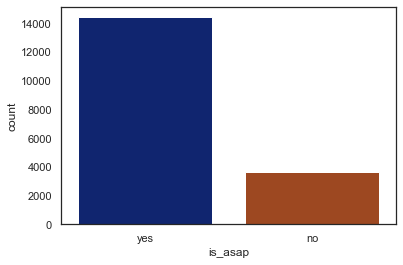

In [24]:
sns.set(style="white", palette="dark", color_codes=True)
sns.despine(left=True)
sns.countplot(df["is_asap"]);

About 14000 customers opt in is_asap and just about 400 customers don't participate in it.

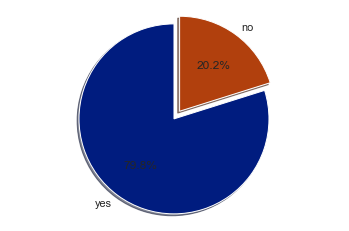

In [25]:
plt.pie(df["is_asap"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=df["is_asap"].unique())
plt.axis('equal') ;

We see the percentage for is_asap is about 80% and 20% for those who say no

In [26]:
df["delivery_region"].value_counts()

Palo Alto        11433
Mountain View     3760
San Jose          2859
Others              26
Name: delivery_region, dtype: int64

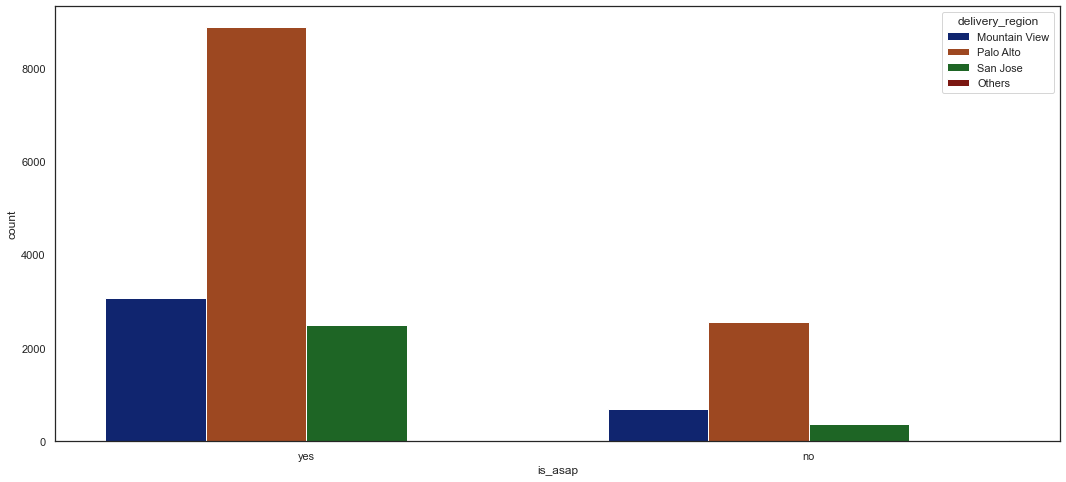

In [27]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(df["is_asap"],hue = df["delivery_region"])

In our above graph we realize the relationship between delivery region and is_asap. Palo Alto region has 11,333, Mountain view with 3,760, San Jose has 2,859 and 26 for no region. Perhaps Mountain view has a higher population than the rest.

In [28]:
df.order_total.mean()

51.26149629383797

# Which region contains the most order amount and discounts, and  tip?

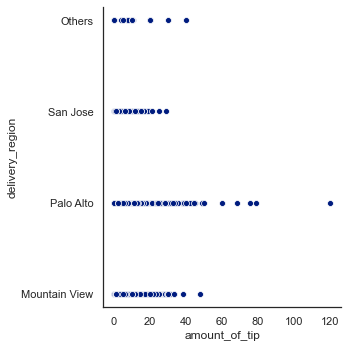

In [29]:
sns.relplot(x="amount_of_tip", y="delivery_region", data=df);

In out above graph we notice Palo Alto contain pays most tips, next is Mountain View then Others, lastly we have San Jose.

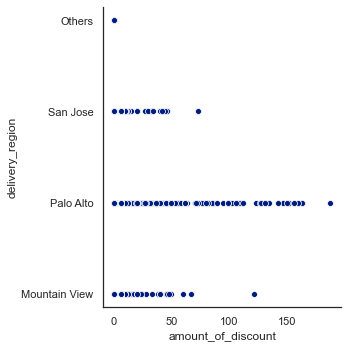

In [30]:
sns.relplot(x="amount_of_discount", y="delivery_region", data=df);

Above is the discont amount in relations to delivery region. Palo Alto gets the most discount, then Mountain View, lastly is San Jose

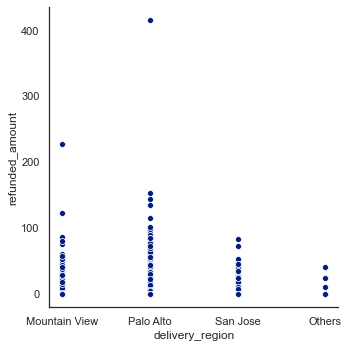

In [31]:
sns.relplot(x="delivery_region", y="refunded_amount", data=df);

Above we hve Palto Alto region is at the top in terms of refunded amount, then Mountain view, after that is San Jose finally is others.

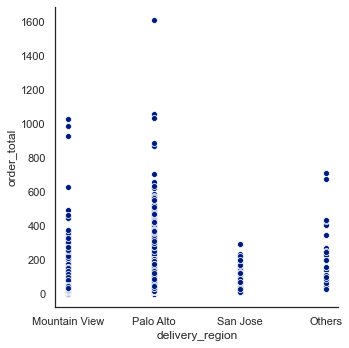

In [32]:
sns.relplot(x="delivery_region", y="order_total", data=df);

In our last graph here, Palo Alto regin spends the most on food and delivery fees, next is Mountain View, then other reigions then San Jose.

# How are days of the week related to time dasher arrive, time food is delivered?

In [33]:
# changing days of the week names to abbreviations
df["day_of_week"] = df["day_of_week"].replace(["Monday"],"Mon")
df["day_of_week"] = df["day_of_week"].replace(["Tuesday"],"Tue")
df["day_of_week"] = df["day_of_week"].replace(["Wednesday"],"Wed")
df["day_of_week"] = df["day_of_week"].replace(["Thursday"],"Thu")
df["day_of_week"] = df["day_of_week"].replace(["Friday"],"Fri")
df["day_of_week"] = df["day_of_week"].replace(["Saturday"],"Sat")
df["day_of_week"] = df["day_of_week"].replace(["Sunday"],"Sun")

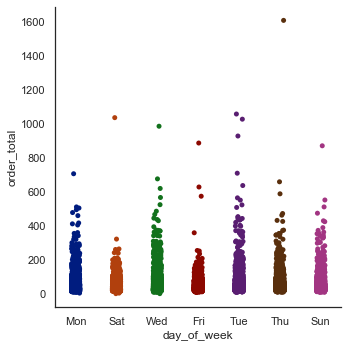

In [34]:
sns.catplot(x="day_of_week", y="order_total", data=df)

Monday, Wednesday, Fridays, Thursdays and Sundays seems to be the days most ppl order food.

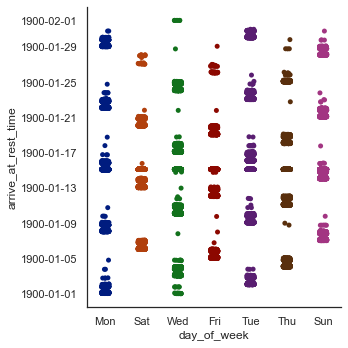

In [35]:
sns.catplot(x="day_of_week", y="arrive_at_rest_time", data=df)

It looks like Monday, Tuesdays, Wednesdays are days that most of dashers work and are at the restauraunts on time.

From our analysis we conclude that most of our revenue derives from Palo Alto divelivery region. This is a prime region to focus on and make sure we target this region in terms of picking up orders quicker and deliverying food faster to this region. Moreover, lets be kind with customers from this region. We should attempt to increase revenue in Montain View and San Jose region by running an email campaign to influence customer buying behavior. In addition to customers buying, we should apply 3%- 5% discounts depending on how much is spent.  

Another key area we should target is the On demand orders. We have about 80% of the market already, but we should attempt to increase that by 5% by promoting customers to place more on-demand orders in Mountain View and San Jose who are struggeling in this area. We can increase our revenue by bringig awareness. Perhaps a shopping card/credit card for customers to have and spend whenever needed.